# Day 10: Introduction to SciPy 

Welcome to Day 10! Today, you'll get an introduction to SciPy, a library that builds on NumPy and provides a large number of higher-level scientific algorithms. We'll explore some of its most useful sub-packages for statistics, optimization, and linear algebra.

As always, let's start by importing the necessary libraries. We're adding `matplotlib` today to help visualize our results.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy import optimize
from scipy import linalg

---

## Part 1: Statistical Functions with `scipy.stats`

The `scipy.stats` module contains a large number of probability distributions and a growing library of statistical functions.

A common task in statistics is to compare two different groups. A t-test is used to determine if there is a significant difference between the means of two groups. Let's create some sample data representing test scores from two different classes.

In [2]:
# Set a seed for reproducibility
np.random.seed(42)

# Class A scores - normally distributed with mean 85 and std dev 5
class_a_scores = np.random.normal(loc=85, scale=5, size=30)

# Class B scores - normally distributed with mean 88 and std dev 5
class_b_scores = np.random.normal(loc=88, scale=5, size=30)

print(f"Class A Mean Score: {np.mean(class_a_scores):.2f}")
print(f"Class B Mean Score: {np.mean(class_b_scores):.2f}")

Class A Mean Score: 84.06
Class B Mean Score: 87.39


**Exercise 1.1:** Before running a statistical test, let's visualize the score distributions for both classes using histograms on the same plot. This will give us an intuitive idea of how much they overlap.

# Your code here
plt.hist

**Solution 1.1**

In [ ]:
#Solution
plt.figure(figsize=(10, 6))
plt.hist(class_a_scores, bins=10, alpha=0.7, label='Class A')
plt.hist(class_b_scores, bins=10, alpha=0.7, label='Class B')
plt.title('Distribution of Scores for Class A and Class B')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

**Exercise 1.2:** Now, perform an independent t-test to see if the difference in mean scores between Class A and Class B is statistically significant. Use `stats.ttest_ind()`.

In [10]:
# Your code here
t_stat, p_value = stats.ttest_ind(class_a_scores, class_b_scores)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

alpha = .05
print(f"\nSignificance level (alpha): {alpha}")

if p_value < alpha:
    print("The p-value is less than our significance level.")
    print("We reject the null hypothesis: the difference is mean scores is statistically significant.")
else:
    print("The p-value is greater than our significance level.")
    print("We reject the null hypothesis: the difference is mean scores is not statistically significant.")

T-statistic: -2.821074768517703
P-value: 0.006542565964576965

Significance level (alpha): 0.05
The p-value is less than our significance level.
We reject the null hypothesis: the difference is mean scores is statistically significant.


**Solution 1.2:**

In [9]:
# Solution
t_statistic, p_value = stats.ttest_ind(class_a_scores, class_b_scores)

print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation of the p-value
alpha = 0.05  # Significance level: our threshold for significance
print(f"\nSignificance level (alpha): {alpha}")

if p_value < alpha:
    print("The p-value is less than our significance level.")
    print("We reject the null hypothesis: the difference in mean scores is statistically significant.")
else:
    print("The p-value is greater than our significance level.")
    print("We fail to reject the null hypothesis: the difference in mean scores is not statistically significant.")

T-statistic: -2.8211
P-value: 0.0065

Significance level (alpha): 0.05
The p-value is less than our significance level.
We reject the null hypothesis: the difference in mean scores is statistically significant.


---

## Part 2: Optimization with `scipy.optimize`

Optimization is the problem of finding an input to a function that results in the minimum (or maximum) output. The `scipy.optimize` module provides several commonly used optimization algorithms.

Let's define a simple quadratic function that we want to minimize: `f(x) = (x - 3)^2 + 5`. We can see by looking at it that the minimum value is 5, which occurs when x = 3.

In [11]:
def my_function(x):
    return (x - 3)**2 + 5

**Exercise 2.1:** Visualize the function to see what it looks like. Plot `my_function(x)` for x values from -5 to 10.

In [ ]:
# Your code here
x = np.linspace(-5, 11, 100)
y = my_function(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label="f(x) = (x - 3)^2 + 5")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()

**Solution 2.1:**

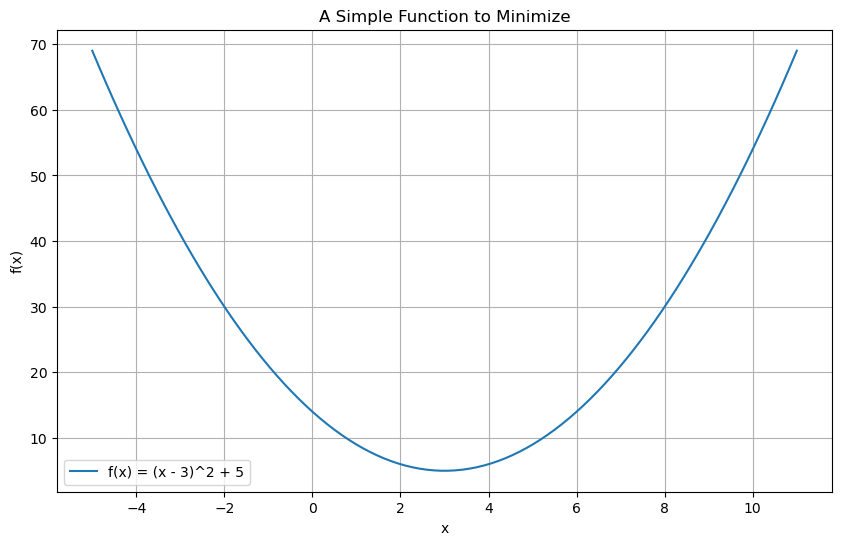

In [17]:
# Solution
x_vals = np.linspace(-5, 11, 100)
y_vals = my_function(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='f(x) = (x - 3)^2 + 5')
plt.title('A Simple Function to Minimize')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

**Exercise 2.2:** Now, use `optimize.minimize()` to find the value of `x` that minimizes `my_function`. Start the search from an initial guess of `x=0`. Then, plot the found minimum on the graph from the previous exercise.

In [ ]:
# Your code here
min_value = optimize.minimize(my_function, 0)
min_x = min_value.x[0]
min_y = min_value.fun

print(f"Optimization Result: \n{min_value}\n")
print(f"The minimum occurs at x = {min_x:.4f}")
print(f"The minimum value of the function is f(x) = {min_y:.4f}")

# The plot
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label="f(x) = (x - 3)^2 + 5")
plt.plot(min_x, min_y, "ro", markersize=10, label=f"Minimum found at ({min_x:.2f}, {min_y:.2f})") # 'ro' is a red circle
plt.title("Function with Found Minimum")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()

**Solution 2.2:**

Optimization Result:
  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 5.000000000000001
        x: [ 3.000e+00]
      nit: 2
      jac: [ 5.960e-08]
 hess_inv: [[ 5.000e-01]]
     nfev: 6
     njev: 3

The minimum occurs at x = 3.0000
The minimum value of the function is f(x) = 5.0000


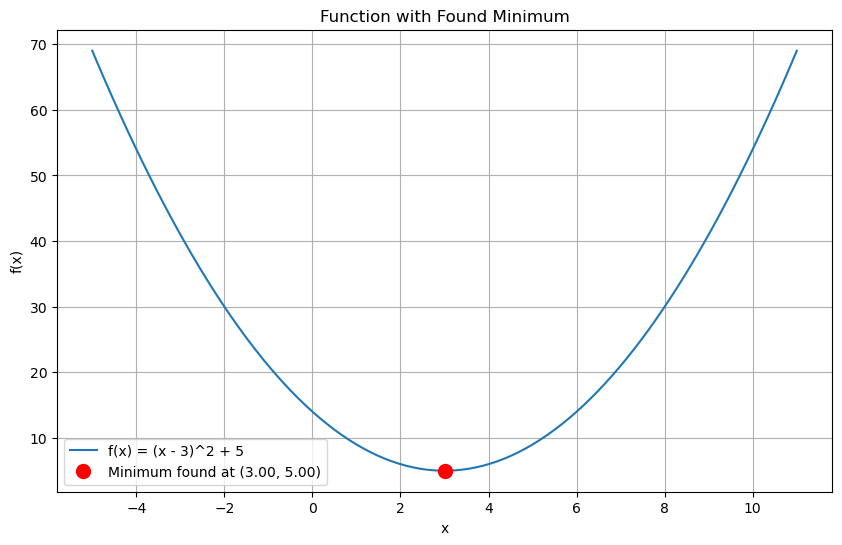

In [23]:
# Solution
initial_guess = 0
result = optimize.minimize(my_function, initial_guess)

# The result is an object with several useful attributes
min_x = result.x[0]  # The input value (x) that gives the minimum
min_y = result.fun   # The minimum value of the function

print(f"Optimization Result:\n{result}\n")
print(f"The minimum occurs at x = {min_x:.4f}")
print(f"The minimum value of the function is f(x) = {min_y:.4f}")

# Now, let's plot it!
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='f(x) = (x - 3)^2 + 5')
plt.plot(min_x, min_y, 'ro', markersize=10, label=f'Minimum found at ({min_x:.2f}, {min_y:.2f})') # 'ro' is red circle
plt.title('Function with Found Minimum')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

---

## Part 3: Linear Algebra with `scipy.linalg`

SciPy also includes a powerful linear algebra module, `scipy.linalg`, which is an improvement over the one in NumPy. A very common problem is solving a system of linear equations.

Consider this simple real-world problem:
* 2 apples and 3 bananas cost &dollar;8.
* 4 apples and 1 banana cost &dollar;9.

We can write this as a system of equations:
1. `2x + 3y = 8`
2. `4x + 1y = 9`

Where `x` is the price of an apple and `y` is the price of a banana. This can be expressed in matrix form as `Ax = B`.

In [28]:
# Matrix A: coefficients of our variables
A = np.array([[2, 3], 
              [4, 1]])

# Vector B: the constants on the right side
B = np.array([8, 9])

print("Matrix A:\n", A)
print("\nVector B:\n", B)

Matrix A:
 [[2 3]
 [4 1]]

Vector B:
 [8 9]


**Exercise 3.1:** Use `linalg.solve()` to solve this system of equations for `x` (our vector of prices).

In [32]:
# Your code here
x = linalg.solve(A, B)
apple_price = prices[0]
banana_price = prices[1]

print(f"The solution vector is: {x}")
print(f"The price of one apple is ${apple_price:.2f}")
print(f"The price of one banana is ${banana_price:.2f}")

print(f"\nVerification Check 1: 2*${apple_price:.2f} + 3*${banana_price:.2f} = ${2*apple_price + 3*banana_price:.2f}")
print(f"Verification Check 2: 4*${apple_price:.2f} + 1*${banana_price:.2f} = ${4*apple_price + 1*banana_price:.2f} ")

The solution vector is: [1.9 1.4]
The price of one apple is $1.90
The price of one banana is $1.40

Verification Check 1: 2*$1.90 + 3*$1.40 = $8.00
Verification Check 2: 4*$1.90 + 1*$1.40 = $9.00 


**Solution 3.1:**

In [30]:
# Solution
prices = linalg.solve(A, B)

apple_price = prices[0]
banana_price = prices[1]

print(f"The solution vector is: {prices}")
print(f"The price of one apple is ${apple_price:.2f}")
print(f"The price of one banana is ${banana_price:.2f}")

# You can verify the result:
print(f"\nVerification Check 1: 2*${apple_price:.2f} + 3*${banana_price:.2f} = ${2*apple_price + 3*banana_price:.2f}")
print(f"Verification Check 2: 4*${apple_price:.2f} + 1*${banana_price:.2f} = ${4*apple_price + 1*banana_price:.2f}")

The solution vector is: [1.9 1.4]
The price of one apple is $1.90
The price of one banana is $1.40

Verification Check 1: 2*$1.90 + 3*$1.40 = $8.00
Verification Check 2: 4*$1.90 + 1*$1.40 = $9.00


---

### Excellent work!

You've just scratched the surface of what SciPy can do. You've seen how to compare groups with `scipy.stats`, find a minimum with `scipy.optimize`, and solve equations with `scipy.linalg`. These are powerful tools for any data scientist or engineer. Tomorrow, we'll dive into interpolation and integration.